# 추천시스템 기초 실습 - 투빅스 14기 이혜린

## 0. 데이터 불러오기 및 탐색

데이터는 movielens에서 제공하는 데이터 중 하나로, 가장 크기가 작은 버전으로 가져왔습니다.
- movies.csv: 영화 제목과 영화 장르에 대한 데이터
- ratings.csv: user(사용자)-movie(아이템) 선호도 데이터
- tags.csv: user가 해당 movie에 부여한 tag 데이터

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

## 1. Content-based Filtering 실습

content-based filtering은 movie(아이템) 간의 유사도를 계산하여 해당 movie와 유사한 movie를 추천해주는 간단한 추천 알고리즘

제공된 데이터에서 movie의 콘텐츠를 확인할 수 있는 데이터는 movies.csv의 장르와 tags.csv의 태그 정보가 있음

In [2]:
movies = pd.read_csv('./ml-latest-small/movies.csv')
ratings = pd.read_csv('./ml-latest-small/ratings.csv')
tags = pd.read_csv('./ml-latest-small/tags.csv')
links = pd.read_csv('./ml-latest-small/links.csv')

In [3]:
# 아이템 간 유사도 계산을 위한 데이터프레임 만들기
# 열은 영화 장르가 될 수도 있고, 영화 태그가 될 수도 있음 (영화 태그의 경우 모든 영화에 대한 태그는 없음)

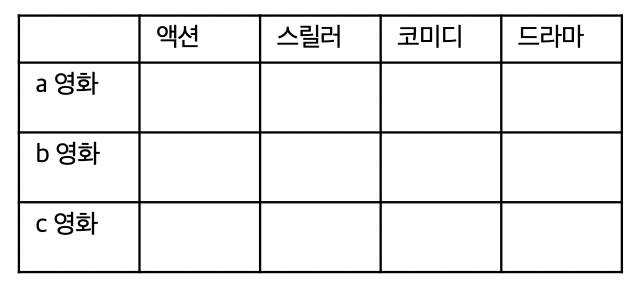

In [4]:
for i in range(len(movies.genres)):
    if movies.genres.isnull()[i]==True:
        movies.genres[i] = '(no genres listed)'

In [5]:
dat = pd.DataFrame(movies['genres'].str.split('|').tolist())
dat.index = movies.movieId
dat = pd.DataFrame(dat.stack())
dat.columns = ['genre']
dat['val'] = int(1)
dat

genre  val
movieId                  
1       0  Adventure    1
        1  Animation    1
        2   Children    1
        3     Comedy    1
        4    Fantasy    1
...              ...  ...
193583  2    Fantasy    1
193585  0      Drama    1
193587  0     Action    1
        1  Animation    1
193609  0     Comedy    1

[22084 rows x 2 columns]

In [6]:
# 해당 데이터프레임은 사용자-영화 선호도 행렬입니당
piv = dat.pivot_table(index='movieId', columns='genre', values='val')
piv

genre,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193583,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# TF-IDF를 적용할 수 있지만 여기서는 skip
# TF-IDF를 적용하게 되면 다음과 같이 나오긴 합니당

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [9]:
movies['corpus'] = movies['genres'].apply(lambda x : ' '.join(x.split('|')))

In [10]:
tfidv = TfidfVectorizer().fit(movies['corpus'])

In [11]:
temp = pd.DataFrame(tfidv.transform(movies['corpus']).toarray())

In [12]:
temp

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.000000,0.416846,0.516225,0.504845,0.267586,0.0,0.0,0.000000,0.482990,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.000000,0.512361,0.000000,0.620525,0.000000,0.0,0.0,0.000000,0.593662,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.000000,0.570915,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.821009,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.000000,0.505015,0.0,0.0,0.466405,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.726241,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,0.436010,0.000000,0.614603,0.000000,0.318581,0.0,0.0,0.000000,0.575034,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
9738,0.000000,0.000000,0.682937,0.000000,0.354002,0.0,0.0,0.000000,0.638968,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
9739,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
9740,0.578606,0.000000,0.815607,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [13]:
# 아이템 간 유사도 구하기
from sklearn.metrics.pairwise import cosine_similarity

In [14]:
# 영화-영화의 유사도를 코사인 유사도를 사용해서 구해줍니당
CBF = pd.DataFrame(cosine_similarity(np.nan_to_num(np.array(piv))))

In [15]:
# movie - moive 아이템 간 유사도 데이터프레임
CBF.index = piv.index
CBF.columns = piv.index
CBF

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
movieId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.774597,0.316228,0.258199,0.447214,0.000000,0.316228,0.632456,0.000000,0.258199,...,0.447214,0.316228,0.316228,0.447214,0.0,0.670820,0.774597,0.00000,0.316228,0.447214
2,0.774597,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.816497,0.000000,0.333333,...,0.000000,0.000000,0.000000,0.000000,0.0,0.288675,0.333333,0.00000,0.000000,0.000000
3,0.316228,0.000000,1.000000,0.816497,0.707107,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.353553,0.000000,0.500000,0.000000,0.0,0.353553,0.408248,0.00000,0.000000,0.707107
4,0.258199,0.000000,0.816497,1.000000,0.577350,0.000000,0.816497,0.000000,0.000000,0.000000,...,0.288675,0.408248,0.816497,0.000000,0.0,0.288675,0.333333,0.57735,0.000000,0.577350
5,0.447214,0.000000,0.707107,0.577350,1.000000,0.000000,0.707107,0.000000,0.000000,0.000000,...,0.500000,0.000000,0.707107,0.000000,0.0,0.500000,0.577350,0.00000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,0.670820,0.288675,0.353553,0.288675,0.500000,0.288675,0.353553,0.000000,0.500000,0.288675,...,0.750000,0.353553,0.353553,0.500000,0.0,1.000000,0.866025,0.00000,0.707107,0.500000
193583,0.774597,0.333333,0.408248,0.333333,0.577350,0.000000,0.408248,0.000000,0.000000,0.000000,...,0.577350,0.408248,0.408248,0.577350,0.0,0.866025,1.000000,0.00000,0.408248,0.577350
193585,0.000000,0.000000,0.000000,0.577350,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.707107,0.707107,0.000000,0.0,0.000000,0.000000,1.00000,0.000000,0.000000


In [16]:
# 각 영화와 다른 영화와의 유사도가 모두 계산되어 있고, 유사도가 높은 영화가 가장 비슷한 영화라고 할 수 있습니당
# 입력 아이템과 가장 유사한 아이템 TOP10개를 뽑아봅시당
def getCBF(movieId):
    
    idx = list(np.argsort(-CBF[movieId])[1:11])
    dat = movies.iloc[idx, :]
    
    print('입력 영화: %s' %movies.title[movies.movieId==movieId].values[0])
    print('입력 영화 장르: %s' %movies.genres[movies.movieId==movieId].values[0])
    
    print('\n=====Most similar List=====')
    return dat

In [17]:
getCBF(193583)

입력 영화: No Game No Life: Zero (2017)
입력 영화 장르: Animation|Comedy|Fantasy

=====Most similar List=====


,movieId,title,genres,corpus
7368,79008,South Park: Imaginationland (2008),Animation|Comedy|Fantasy,Animation Comedy Fantasy
8999,139855,Anomalisa (2015),Animation|Comedy|Fantasy,Animation Comedy Fantasy
4558,6773,"Triplets of Belleville, The (Les triplettes de...",Animation|Comedy|Fantasy,Animation Comedy Fantasy
7199,72692,Mickey's Once Upon a Christmas (1999),Animation|Comedy|Fantasy,Animation Comedy Fantasy
3098,4158,Monkeybone (2001),Animation|Comedy|Fantasy,Animation Comedy Fantasy
9665,182297,Porky in Wackyland (1938),Animation|Comedy|Fantasy,Animation Comedy Fantasy
4841,7228,Cool World (1992),Animation|Comedy|Fantasy,Animation Comedy Fantasy
8725,126577,"Daddy, I'm A Zombie (2012)",Animation|Comedy|Fantasy,Animation Comedy Fantasy
6859,62336,FLCL (2000),Animation|Comedy|Fantasy|Sci-Fi,Animation Comedy Fantasy Sci-Fi
870,1151,Lesson Faust (1994),Animation|Comedy|Drama|Fantasy,Animation Comedy Drama Fantasy


## 2. Collaborative Filtering 실습

User-based CF를 실습해 봅시당

In [18]:
# User-Item 간 선호도 데이터프레임 만들기

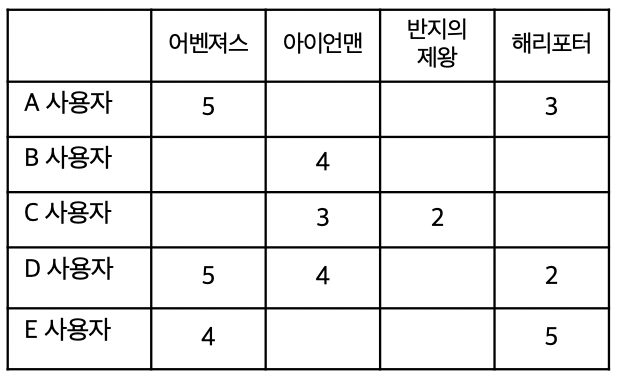

In [19]:
# 해당 데이터프레임은 사용자-영화 선호도 데이터프레임입니당
piv = ratings.pivot_table(index='userId', columns='movieId', values='rating')
piv

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,2.5,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# 사용자 간 유사도 구하기
CF = pd.DataFrame(cosine_similarity(np.nan_to_num(np.array(piv))))

In [21]:
# 사용자와 사용자의 유사도를 구할 때 꼭 코사인 유사도를 사용하지 않아도 됩니당
# 보완 코사인 유사도 혹은 피어슨 상관계수를 적용해보아유
CF.index = piv.index
CF.columns = piv.index
CF

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.027283,0.059720,0.194395,0.129080,0.128152,0.158744,0.136968,0.064263,0.016875,...,0.080554,0.164455,0.221486,0.070669,0.153625,0.164191,0.269389,0.291097,0.093572,0.145321
2,0.027283,1.000000,0.000000,0.003726,0.016614,0.025333,0.027585,0.027257,0.000000,0.067445,...,0.202671,0.016866,0.011997,0.000000,0.000000,0.028429,0.012948,0.046211,0.027565,0.102427
3,0.059720,0.000000,1.000000,0.002251,0.005020,0.003936,0.000000,0.004941,0.000000,0.000000,...,0.005048,0.004892,0.024992,0.000000,0.010694,0.012993,0.019247,0.021128,0.000000,0.032119
4,0.194395,0.003726,0.002251,1.000000,0.128659,0.088491,0.115120,0.062969,0.011361,0.031163,...,0.085938,0.128273,0.307973,0.052985,0.084584,0.200395,0.131746,0.149858,0.032198,0.107683
5,0.129080,0.016614,0.005020,0.128659,1.000000,0.300349,0.108342,0.429075,0.000000,0.030611,...,0.068048,0.418747,0.110148,0.258773,0.148758,0.106435,0.152866,0.135535,0.261232,0.060792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.164191,0.028429,0.012993,0.200395,0.106435,0.102123,0.200035,0.099388,0.075898,0.088963,...,0.178084,0.116534,0.300669,0.066032,0.148141,1.000000,0.153063,0.262558,0.069622,0.201104
607,0.269389,0.012948,0.019247,0.131746,0.152866,0.162182,0.186114,0.185142,0.011844,0.010451,...,0.092525,0.199910,0.203540,0.137834,0.118780,0.153063,1.000000,0.283081,0.149190,0.139114
608,0.291097,0.046211,0.021128,0.149858,0.135535,0.178809,0.323541,0.187233,0.100435,0.077424,...,0.158355,0.197514,0.232771,0.155306,0.178142,0.262558,0.283081,1.000000,0.121993,0.322055


In [138]:
# 피어슨 상관계수
cor = abs(pd.DataFrame(np.nan_to_num(np.array(piv))).corr())

In [30]:
user_list = pd.merge(movies, ratings[ratings['userId']==604].drop('userId', axis=1), on='movieId', how='inner')

In [31]:
user_list

,movieId,title,genres,corpus,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Adventure Animation Children Comedy Fantasy,3.0,832079851
1,2,Jumanji (1995),Adventure|Children|Fantasy,Adventure Children Fantasy,5.0,832080293
2,5,Father of the Bride Part II (1995),Comedy,Comedy,3.0,832080355
3,6,Heat (1995),Action|Crime|Thriller,Action Crime Thriller,3.0,832080355
4,14,Nixon (1995),Drama,Drama,4.0,832081027
...,...,...,...,...,...,...
95,636,Frisk (1995),Drama,Drama,3.0,832080690
96,637,Sgt. Bilko (1996),Comedy,Comedy,4.0,832081130
97,708,"Truth About Cats & Dogs, The (1996)",Comedy|Romance,Comedy Romance,3.0,832080461
98,724,"Craft, The (1996)",Drama|Fantasy|Horror|Thriller,Drama Fantasy Horror Thriller,3.0,832080735


In [59]:
fre = pd.DataFrame(sorted(pd.DataFrame(user_list['corpus'].str.split().tolist()).stack().values))

In [64]:
fre.columns = ['fre']

In [79]:
# 입력 사용자와 가장 가까운 유저에서 선호도가 가장 높은 아이템 TOP5를 추천해봅시당!
# 이 때, 입력 사용자가 이미 시청한/평가한 영화는 제외해야하도록 추천 리스트를 만들어봅시당
def getCF(userId):
    
    a = np.argsort(-CF[userId])
    max_user = int(a[a==userId].index.values) # userId
    
    user_list = pd.merge(movies, ratings[ratings['userId']==userId].drop('userId', axis=1), on='movieId', how='inner')
    max_list = pd.merge(movies,ratings[ratings['userId']==max_user].drop('userId', axis=1), on='movieId', how='inner')
    max_list.index = max_list.movieId
    max_list = max_list.sort_values(by='rating', ascending=False)
    saw_idx = np.array(list(ratings[ratings.userId==userId].movieId))
    
    for i in np.array(max_list.index):
        if i in saw_idx:
            max_list = max_list.drop(index=i)
    
    fre = pd.DataFrame(pd.DataFrame(user_list['corpus'].str.split().tolist()).stack().values)
    fre.columns = ['fre']
    
    plt.bar(fre['fre'].unique(),fre['fre'].value_counts())
    plt.title("%d's favorite genres" %userId)
    plt.xticks(rotation=90)
    plt.show()
    
    dat = max_list.drop(['rating', 'timestamp'], axis=1)
    print('\n=====Recommendation List=====')
    
    return(dat[:5])

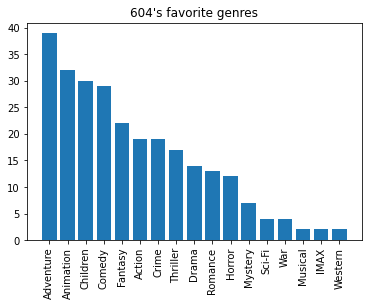


=====Recommendation List=====


,movieId,title,genres,corpus
movieId,,,,
2739,2739,"Color Purple, The (1985)",Drama,Drama
318,318,"Shawshank Redemption, The (1994)",Crime|Drama,Crime Drama
345,345,"Adventures of Priscilla, Queen of the Desert, ...",Comedy|Drama,Comedy Drama
6983,6983,Jane Eyre (1944),Drama|Romance,Drama Romance
4921,4921,Little Women (1933),Drama|Romance,Drama Romance


In [80]:
getCF(604)

## 3. Matrix Factorization 실습

같은 폴더에 있는 MF.py의 MatrixFactorization()을 적용해 봅시당

In [81]:
import MF

In [82]:
# 사용자-영화 선호도 데이터프레임입니당
piv.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
piv = np.nan_to_num(np.array(piv))
piv

array([[4. , 0. , 4. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [2.5, 2. , 2. , ..., 0. , 0. , 0. ],
       [3. , 0. , 0. , ..., 0. , 0. , 0. ],
       [5. , 0. , 0. , ..., 0. , 0. , 0. ]])

In [90]:
# MF.py를 참고하여 인자를 입력해 보아유
factorizer = MF.MatrixFactorization(piv, k=10, learning_rate=0.1, reg_param=0.01, epochs=100, verbose=True)
factorizer.fit()
R_reduced = factorizer.print_results()

Iteration: 10 ; cost = 0.0028
Iteration: 20 ; cost = 0.0026
Iteration: 30 ; cost = 0.0026
Iteration: 40 ; cost = 0.0025
Iteration: 50 ; cost = 0.0025
Iteration: 60 ; cost = 0.0024
Iteration: 70 ; cost = 0.0024
Iteration: 80 ; cost = 0.0024
Iteration: 90 ; cost = 0.0023
Iteration: 100 ; cost = 0.0023
User Latent P:
[[-0.10003773 -0.03259308  0.08871223 ...  0.23217052 -0.4028163
   0.54938301]
 [-1.25125993 -0.44547285 -0.22546713 ...  0.13365455  0.50113866
  -0.3689246 ]
 [-1.0071091   0.17200604 -0.36375167 ... -0.8778463  -1.25079376
  -0.86791105]
 ...
 [-0.31728314  0.31458843  0.09531038 ... -0.32658755 -0.26741485
  -0.09082512]
 [ 0.019207    0.67263571 -0.01768703 ... -0.02359247  0.44744928
   0.22543728]
 [-0.36190824 -0.07943252  0.30420686 ... -0.38879349  0.23409241
  -0.06121   ]]
Item Latent Q:
[[-0.16152471  0.4955828  -0.17223691 ... -0.27746656  0.07969906
  -0.21144603]
 [ 0.08410696 -0.07286025 -1.0164226  ... -0.86218171  0.53761414
  -0.41329299]
 [ 0.51455395  0

In [91]:
# Matrix Factorizaion으로 찾아낸 잠재요인을 기반으로 재생산한 행렬이네유
pd.DataFrame(R_reduced)

,0,1,2,3,4,5,6,7,8,9,...,9714,9715,9716,9717,9718,9719,9720,9721,9722,9723
0,4.543667,4.633298,4.069759,3.571487,3.648596,4.514570,4.070399,4.162517,4.189586,4.310481,...,3.868756,2.688135,4.438837,6.146303,5.525020,5.821063,4.645682,3.451424,5.720294,4.134002
1,3.693588,2.272172,2.816674,2.824514,1.777056,4.123861,1.575233,4.179396,2.014641,3.115886,...,5.011370,2.826134,4.970137,4.623921,3.073633,2.166179,3.222745,2.748486,3.708156,2.897368
2,1.631473,1.484099,-0.485371,-0.949225,0.451799,2.577944,-0.668698,7.740384,3.032020,2.562321,...,3.120254,0.005678,3.710695,1.528819,2.055808,1.757829,2.583722,3.690743,2.647338,1.423703
3,2.896215,3.710485,1.106664,0.126874,1.522101,3.249101,0.750141,5.433908,3.469222,2.325681,...,4.723446,1.610541,5.275180,2.518400,0.753682,4.741455,-0.019976,3.994900,4.317756,2.625115
4,3.171036,3.888113,1.017194,2.282854,2.653710,3.462837,2.993076,2.762358,3.139954,4.305261,...,3.744754,1.386632,2.529900,3.869714,4.872617,3.766350,4.373671,-0.094029,3.889733,2.430462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,3.588541,3.830808,2.973902,2.398046,2.502932,3.729377,2.922189,2.432125,1.672463,3.261559,...,5.128644,2.604986,2.652464,3.418151,3.249113,4.688021,3.370131,2.360049,3.995363,3.804985
606,3.443450,3.114553,4.266525,2.987666,2.715713,3.864862,3.038086,1.911360,2.379663,2.831708,...,2.428732,1.611005,2.244497,4.992388,4.378863,5.705045,3.541320,2.884416,5.034740,1.948057
607,3.799855,3.388072,3.523117,3.351413,2.771179,4.492793,3.791062,3.397812,3.813095,4.122212,...,1.450045,3.476910,2.593573,5.502658,5.501894,5.291016,4.889036,3.660767,4.948276,1.531049
608,3.440824,3.347629,2.208479,2.363324,1.904591,3.434769,2.911571,2.323078,2.068487,3.620766,...,4.244145,3.161111,2.290457,3.105255,3.379443,3.302993,3.853145,1.390726,3.851895,3.368529


## 4. 본인만의 추천 리스트 만들어보기

배운 내용 혹은 알고 있는 추천 알고리즘을 사용해서 user의 다음 추천 아이템에 대한 TOP10 추천 리스트를 만들어 봅시당

코드를 이해할 수 있도록 주석을 꼼꼼하게 달아주시면 감사하겠습니다!

In [124]:
# 영화별 태그 유사도를 바탕으로 추천 시스템 만들기

In [117]:
mean = pd.DataFrame(ratings['rating'].groupby(ratings['movieId']).mean()) #영화별 평균 평점 계산

In [191]:
da = pd.merge(movies, mean, on='movieId', how='inner')
da = da.drop(['genres', 'corpus'], axis=1)
dat = pd.merge(da, tags, on='movieId', how='inner')
dat = dat.drop(['userId', 'timestamp', 'val'], axis=1)
dat

,movieId,title,rating,tag
0,1,Toy Story (1995),3.920930,pixar
1,1,Toy Story (1995),3.920930,pixar
2,1,Toy Story (1995),3.920930,fun
3,2,Jumanji (1995),3.431818,fantasy
4,2,Jumanji (1995),3.431818,magic board game
...,...,...,...,...
3657,187595,Solo: A Star Wars Story (2018),3.900000,star wars
3658,193565,Gintama: The Movie (2010),3.500000,anime
3659,193565,Gintama: The Movie (2010),3.500000,comedy
3660,193565,Gintama: The Movie (2010),3.500000,gintama


In [192]:
pd.DataFrame(dat['tag'].unique()).head(10) # 띄어쓰기 기준으로 나누기에는 애매한 부분이 있어서 나누지 않았습니다!

,0
0,pixar
1,fun
2,fantasy
3,magic board game
4,robin williams
5,game
6,moldy
7,old
8,pregnancy
9,remake


In [193]:
dat['tag'].value_counts()

in netflix queue               119
atmospheric                     41
thought-provoking               24
surreal                         24
funny                           24
                              ... 
the entertainer                  1
dust bowl                        1
avant-garde romantic comedy      1
world war i                      1
creature feature                 1
Name: tag, Length: 1472, dtype: int64

In [194]:
mypiv = dat.pivot_table(index='movieId', columns='tag', values='rating')
mypiv

tag,"""artsy""",06 oscar nominated best movie - animation,1900s,1920s,1950s,1960s,1970s,1980s,1990s,2001-like,...,world war i,world war ii,writing,wrongful imprisonment,wry,younger men,zither,zoe kazan,zombies,zooey deschanel
movieId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [195]:
mypiv.loc[60756, 'funny'] # 적절하게 병합되었음을 볼 수 있다.

3.5535714285714284

In [196]:
# 코사인 유사도 계산
cos = pd.DataFrame(cosine_similarity(np.nan_to_num(np.array(mypiv))))
cos.index = mypiv.index
cos.columns = mypiv.index
cos

movieId,1,2,3,5,7,11,14,16,17,21,...,176371,176419,179401,180031,180985,183611,184471,187593,187595,193565
movieId,,,,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
2,0.0,1.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
3,0.0,0.0,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
5,0.0,0.0,0.0,1.000000,0.707107,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
7,0.0,0.0,0.0,0.707107,1.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183611,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.57735,0.0,0.0,1.000000,0.0,0.0,0.0,0.288675
184471,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.000000,1.0,0.0,0.0,0.000000
187593,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,1.0,0.0,0.000000


In [204]:
dat.index = dat.movieId

In [210]:
# 영화별 태그 유사성을 가지고, 해당 영화와 가장 비슷한 상위 n개의 영화 추천받기

def get_tag(movieId, n):
    
    idx = list(np.argsort(-cos[movieId])[1:n+1])
    data = dat.iloc[idx, :]
    
    print('입력 영화: %s' %dat.title[dat.movieId==movieId].values[0])
    print('입력 영화 태그: %s' %dat.tag[dat.movieId==movieId].values[0])
    
    print('\n=====Most similar List=====')
    return data

In [211]:
get_tag(16,10)

입력 영화: Casino (1995)
입력 영화 태그: mafia

=====Most similar List=====


,movieId,title,rating,tag
movieId,,,,
293,293,Léon: The Professional (a.k.a. The Professiona...,4.018797,assassin
3,3,Grumpier Old Men (1995),3.259615,moldy
296,296,Pulp Fiction (1994),4.197068,gritty
307,307,Three Colors: Blue (Trois couleurs: Bleu) (1993),3.895833,death
296,296,Pulp Fiction (1994),4.197068,killer-as-protagonist
592,592,Batman (1989),3.428571,superhero
296,296,Pulp Fiction (1994),4.197068,hit men
199,199,"Umbrellas of Cherbourg, The (Parapluies de Che...",4.125000,made me cry
2731,2731,"400 Blows, The (Les quatre cents coups) (1959)",4.000000,gentle
